In [100]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [101]:
files = ["cAGR.csv", "cCON.csv", "cEXT.csv", "cNEU.csv", "cOPN.csv"]
dfs = []
for file in files:
    df = pd.read_csv(file, encoding='latin-1')
    dfs.append(df)

In [102]:
agr = dfs[0]
con = dfs[1]
ext = dfs[2]
neu = dfs[3]
opn = dfs[4]

In [103]:
cCon = con["cCON"]
cExt = ext["cEXT"]
cNeu = neu["cNEU"]
cOpn = opn["cOPN"]

In [104]:
agr["cCON"] = cCon
agr["cEXT"] = cExt
agr["cNEU"] = cNeu
agr["cOPN"] = cOpn

In [105]:
agr.head()

,STATUS,cAGR,cCON,cEXT,cNEU,cOPN
0,likes the sound of thunder.,0,0,0,1,1
1,is so sleepy it's not even funny that's she ca...,0,0,0,1,1
2,is sore and wants the knot of muscles at the b...,0,0,0,1,1
3,likes how the day sounds in this new song.,0,0,0,1,1
4,is home. <3,0,0,0,1,1


In [106]:
agr.loc["total"] = pd.Series(("", agr['cAGR'].sum(), agr['cCON'].sum(), agr['cEXT'].sum(), agr['cNEU'].sum(), agr['cOPN'].sum()), index = ["STATUS", "cAGR", "cCON", "cEXT", "cNEU", "cOPN"] )


In [107]:
finalDF = agr

In [108]:
finalDF.tail()

,STATUS,cAGR,cCON,cEXT,cNEU,cOPN
9913,is wishing it was Saturday.,1,1,1,1,1
9914,is studying hard for the G.R.E.,1,1,1,1,1
9915,snipers get more head,0,0,0,1,1
9916,Last night was amazing! Not only did I see *PR...,0,1,1,1,1
total,,5268,4556,4210,3717,7370


In [113]:
labels=np.array(["cAGR", "cCON", "cEXT", "cNEU", "cOPN"])
titles = np.array(["AGREEABLENESS", "CONSCIENTIOUSNESS", "EXTRAVERSION", "NEUROTICISM", "OPENNESS"])
stats=finalDF.loc["total",labels].values
stats

array([5268, 4556, 4210, 3717, 7370], dtype=object)

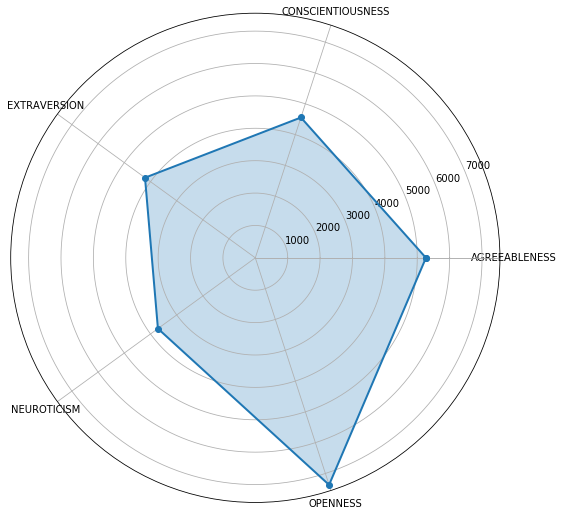

In [114]:
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))
fig=plt.figure()
fig.set_size_inches(16.5, 9, forward=True)
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, titles)
ax.grid(True)